Download packages

In [2]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
from sklego.meta import OrdinalClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import scipy
from sklearn.metrics import balanced_accuracy_score

In [3]:
random.seed(8)

Create new feature names to take the mean and std across epochs pr person

In [4]:
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]
print(mean_list)

['Delta_mean', 'Delta_N_mean', 'Theta_mean', 'Theta_N_mean', 'Alpha_mean', 'Alpha_N_mean', 'Beta_mean', 'Beta_N_mean', 'Gamma_mean', 'Gamma_N_mean', 'SE_mean', 'MSF_mean', 'Sef90_mean', 'Sef95_mean', 'PE_mean', 'wSMI_mean', 'Kolmogorov_mean', 'MeanRR_mean', 'StdRR_mean', 'MeanHR_mean', 'StdHR_mean', 'MinHR_mean', 'MaxHR_mean']


Concatenate data

In [5]:
path ='CSV_features_NEW/'
folder = os.fsencode(path)
renamed_markers_list = ['No.', 'Event', 'Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]


patient_numbers = []
r_data = []
m_data = []
f_data = []

all_data = []


for file in os.listdir(folder):
    filename = os.fsdecode(file)
    patient_numbers.append(filename[0:3])
    fname = path + filename
    data = pd.read_csv(fname)
    data.columns = renamed_markers_list
    all_data.append(data)



Ignore irrelevant warnings

In [6]:
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [8]:
all_data_as_df = pd.concat(all_data)

In [16]:
#check if the normalization is correct for psd
#data = all_data[0]
#print(data.loc[:,['Alpha_N', 'Delta_N', 'Theta_N', 'Beta_N']].sum(axis=1))
sums_list = []
for i, data in enumerate(all_data):
    sums = data.loc[:,['Alpha_N', 'Delta_N', 'Theta_N', 'Beta_N']].sum(axis=1)
    #if i == 0:
    #    print(sums)
    sums_list.append(np.mean(sums))
#print(sorted(sums_list))

In [18]:
A = set()
B = set()
C = set()
D = set()
numbers = []
for i, data in enumerate(all_data):
    
    if np.min(data['Delta']) < -300:
        A.add(patient_numbers[i])
        numbers.append(i)
    if np.min(data['Theta']) < -300:
        B.add(patient_numbers[i])
    if np.min(data['Alpha']) < -300:
        C.add(patient_numbers[i])
    if np.min(data['Beta']) < -300:
        D.add(patient_numbers[i])

In [19]:
A1 = set()
B1 = set()
C1 = set()
D1 = set()
E1 = set()
numbers = []
for i, data in enumerate(all_data):
    '', '', '', 'wSMI'
    if np.min(data['MSF']) == 0.0:
        A1.add(patient_numbers[i])
        numbers.append(i)
    if np.min(data['Sef90']) == 0.0:
        B1.add(patient_numbers[i])
    if np.min(data['Sef95']) == 0.0:
        C1.add(patient_numbers[i])
    if np.min(data['PE']) == 0.0:
        D1.add(patient_numbers[i])
    if np.min(data['wSMI']) == 0.0:
        E1.add(patient_numbers[i])

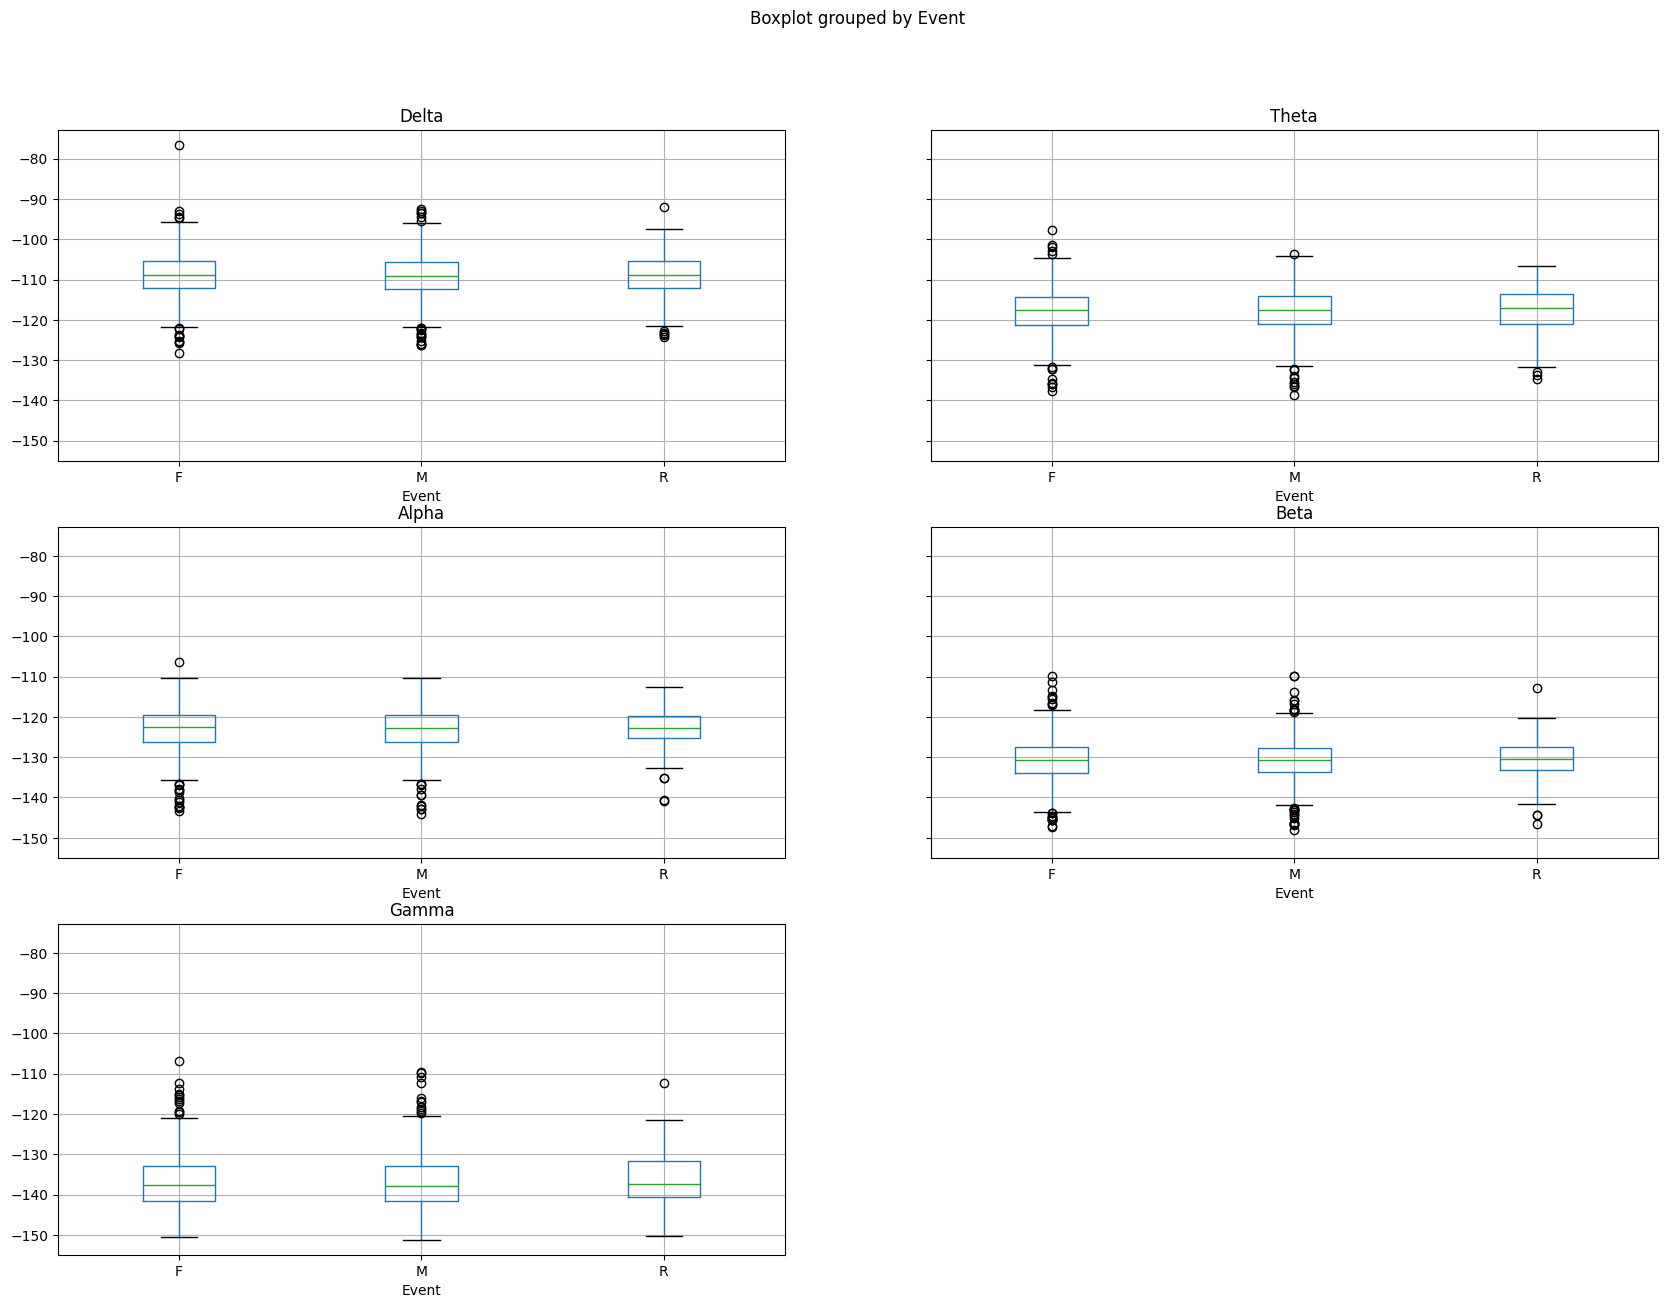

In [39]:
all_data_as_df.boxplot(column=['Delta','Theta', 'Alpha','Beta', 'Gamma'], by='Event', figsize=(20,15),sharex=False)
plt.show()

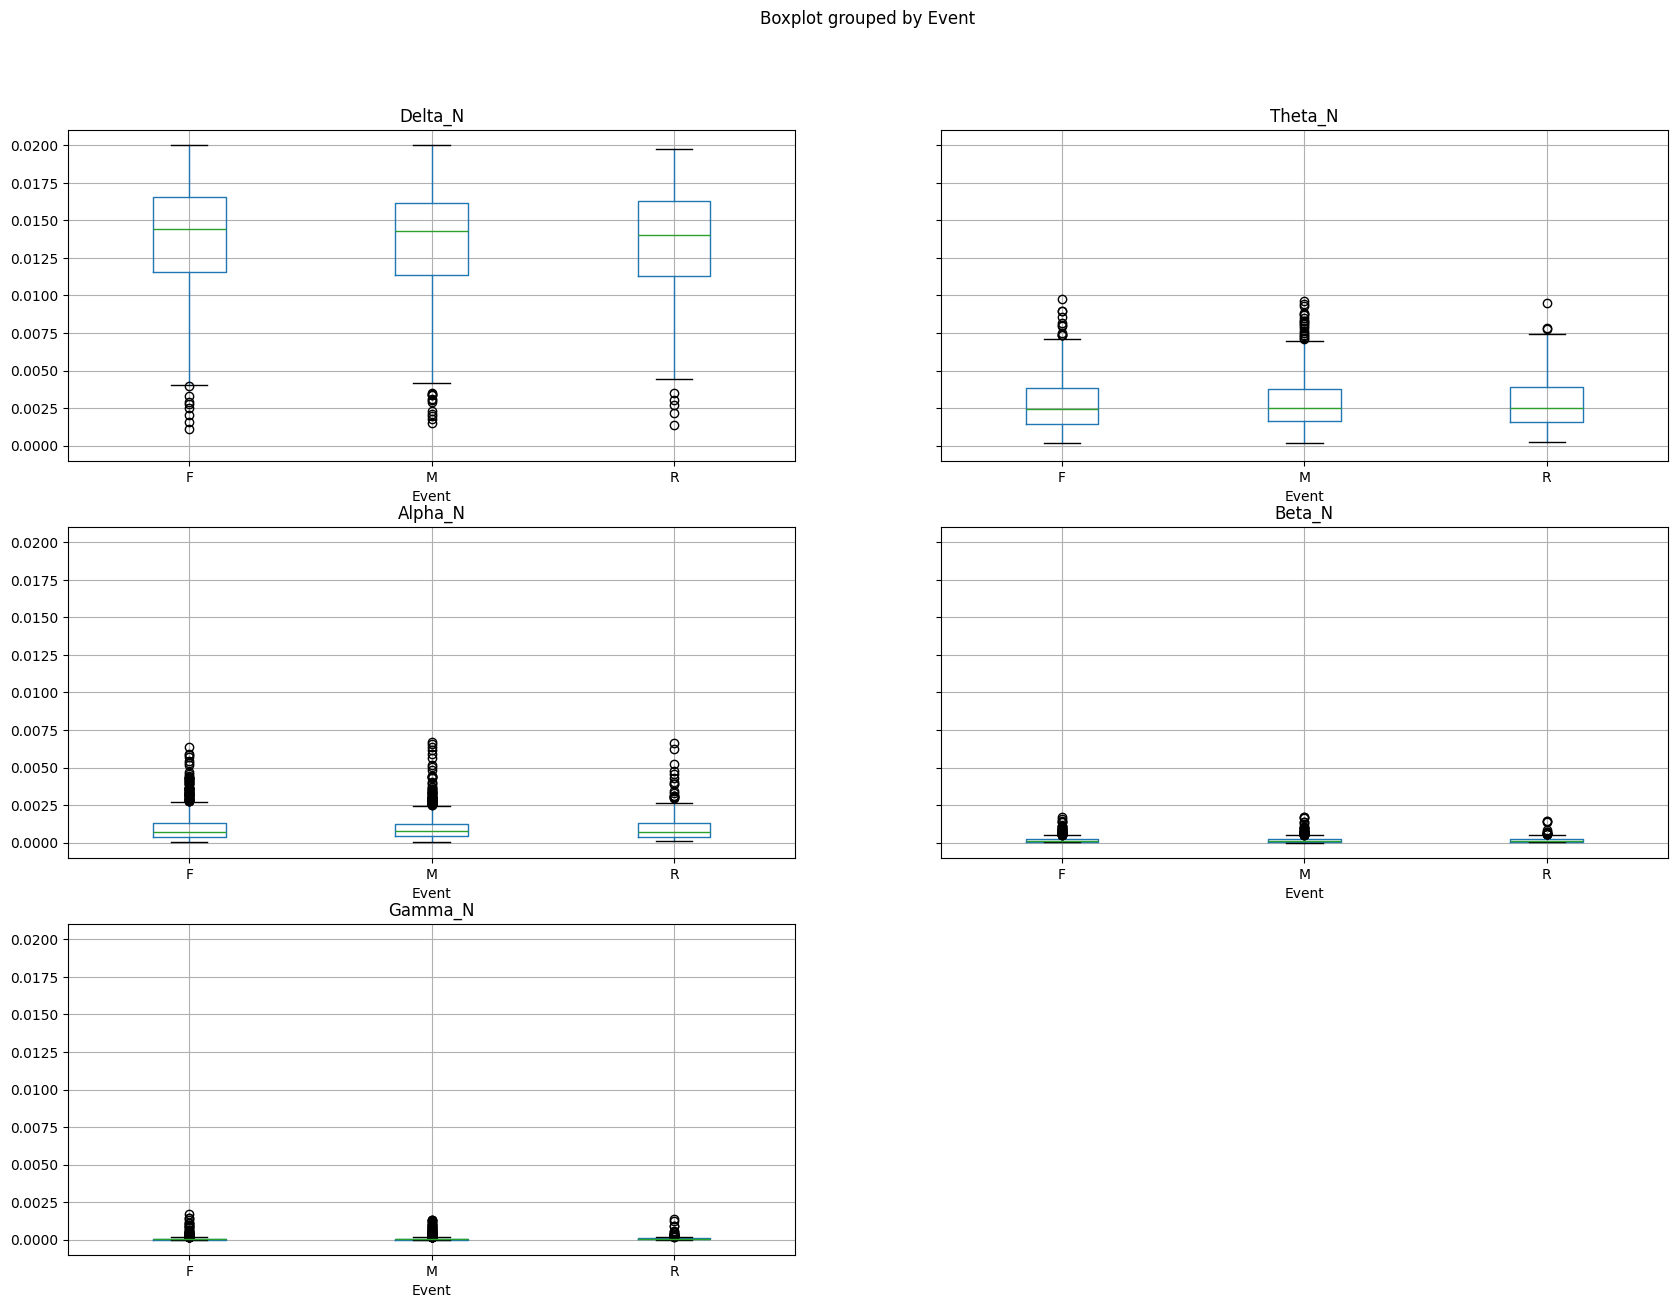

In [40]:
all_data_as_df.boxplot(column=['Delta_N','Theta_N', 'Alpha_N','Beta_N', 'Gamma_N'], by='Event', figsize=(20,15), sharex=False)
plt.show()

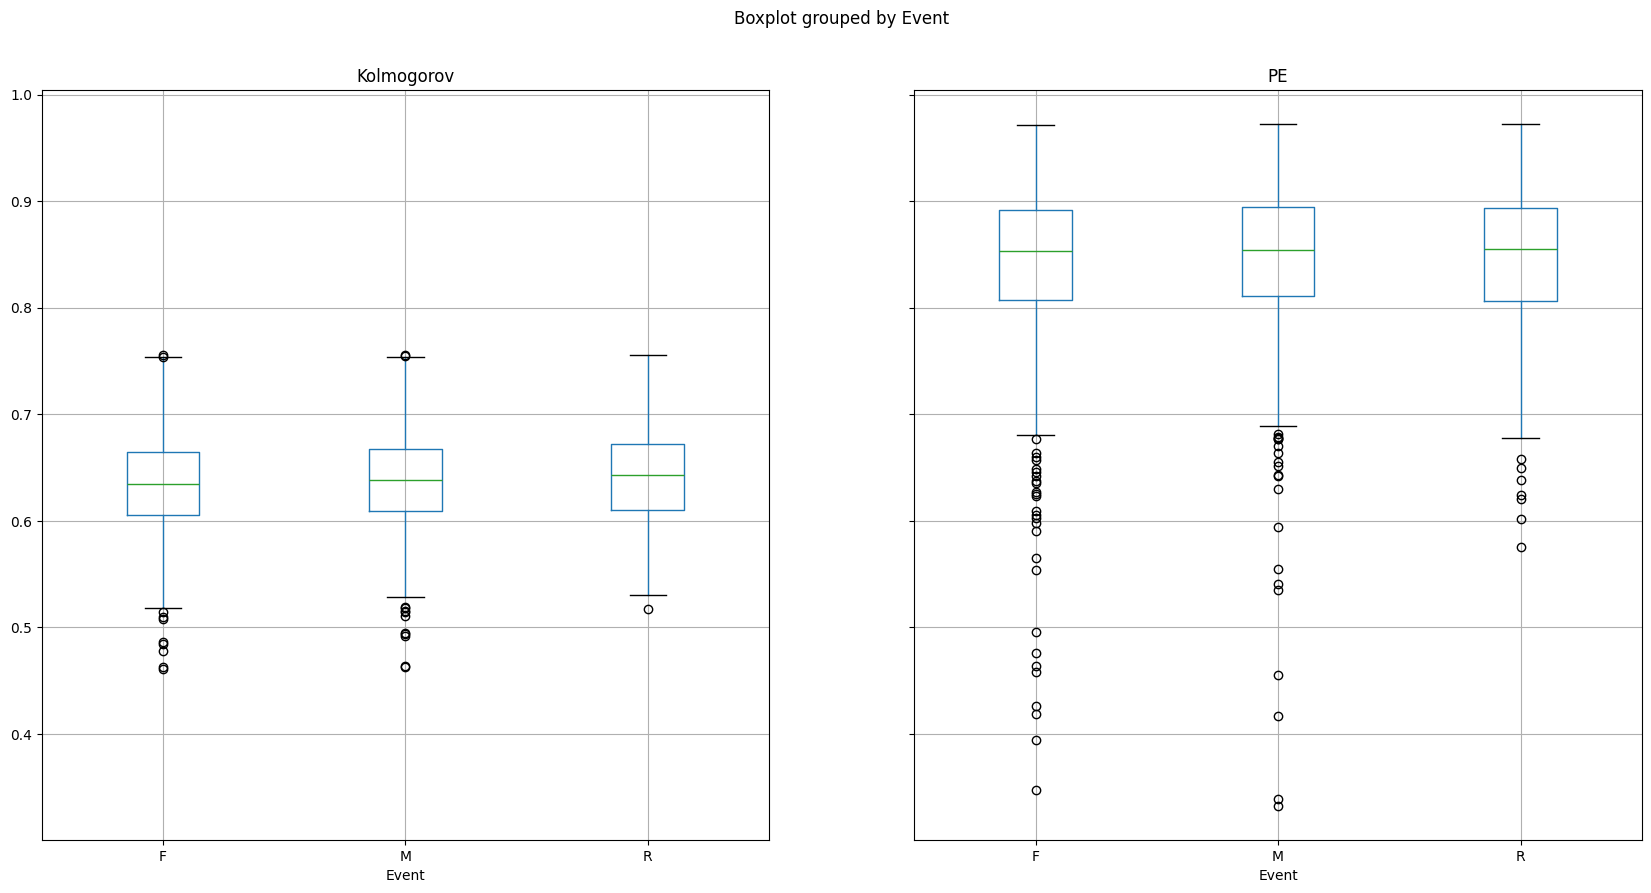

In [23]:
all_data_as_df.boxplot(column=['Kolmogorov', 'PE'], by='Event', figsize=(20,10), sharex=False)
plt.show()

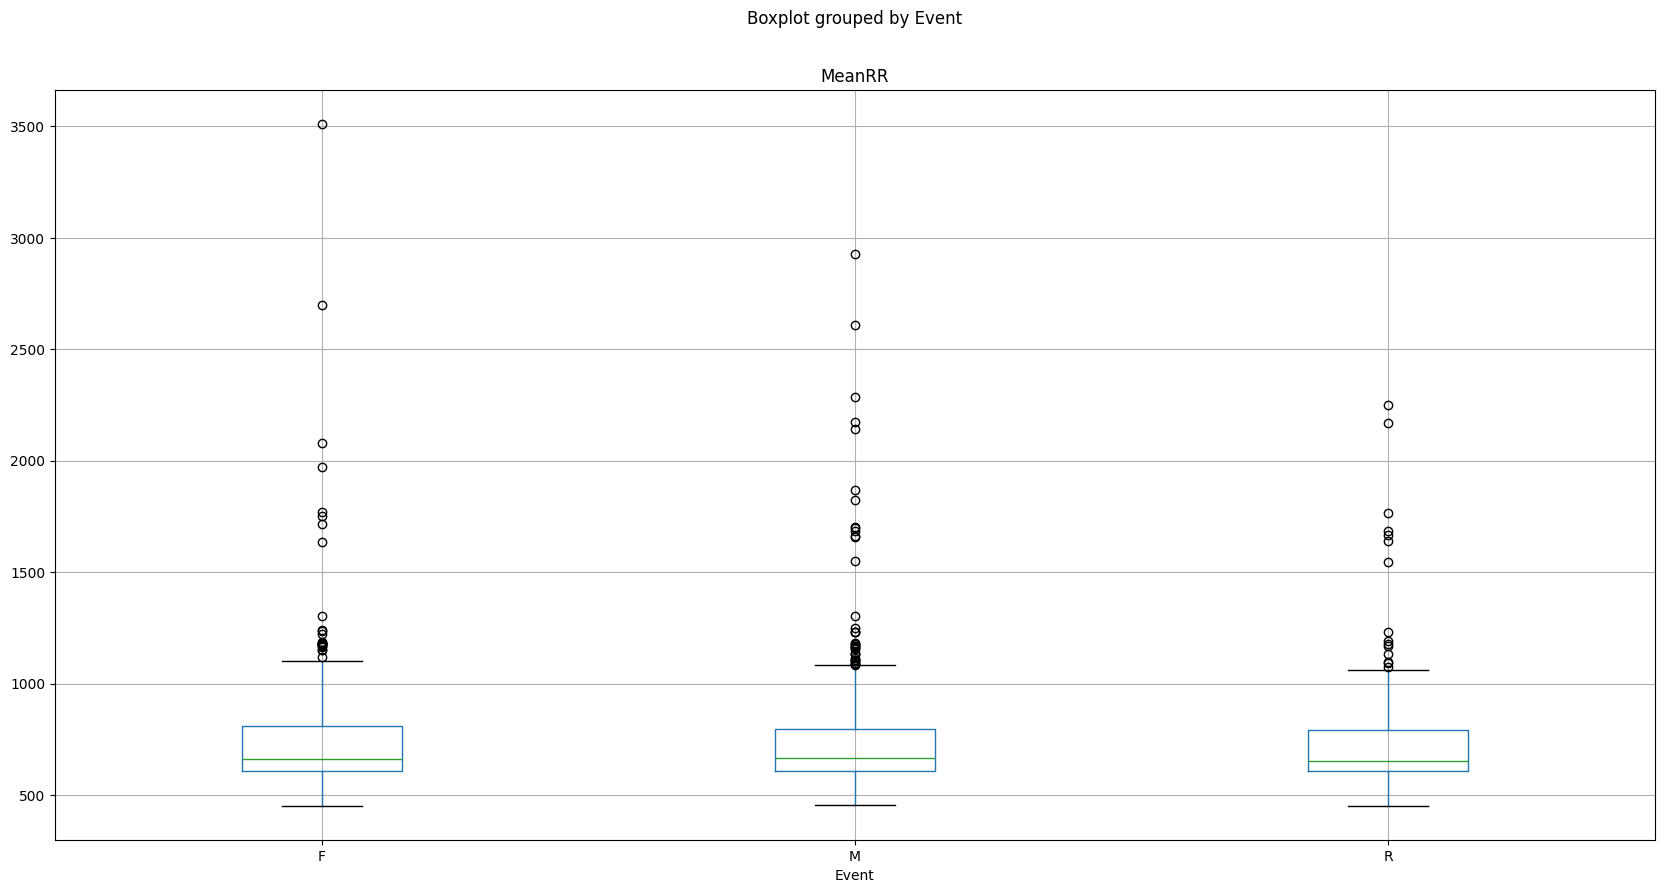

In [24]:
all_data_as_df.boxplot(column=['MeanRR'], by='Event', figsize=(20,10))
plt.show()

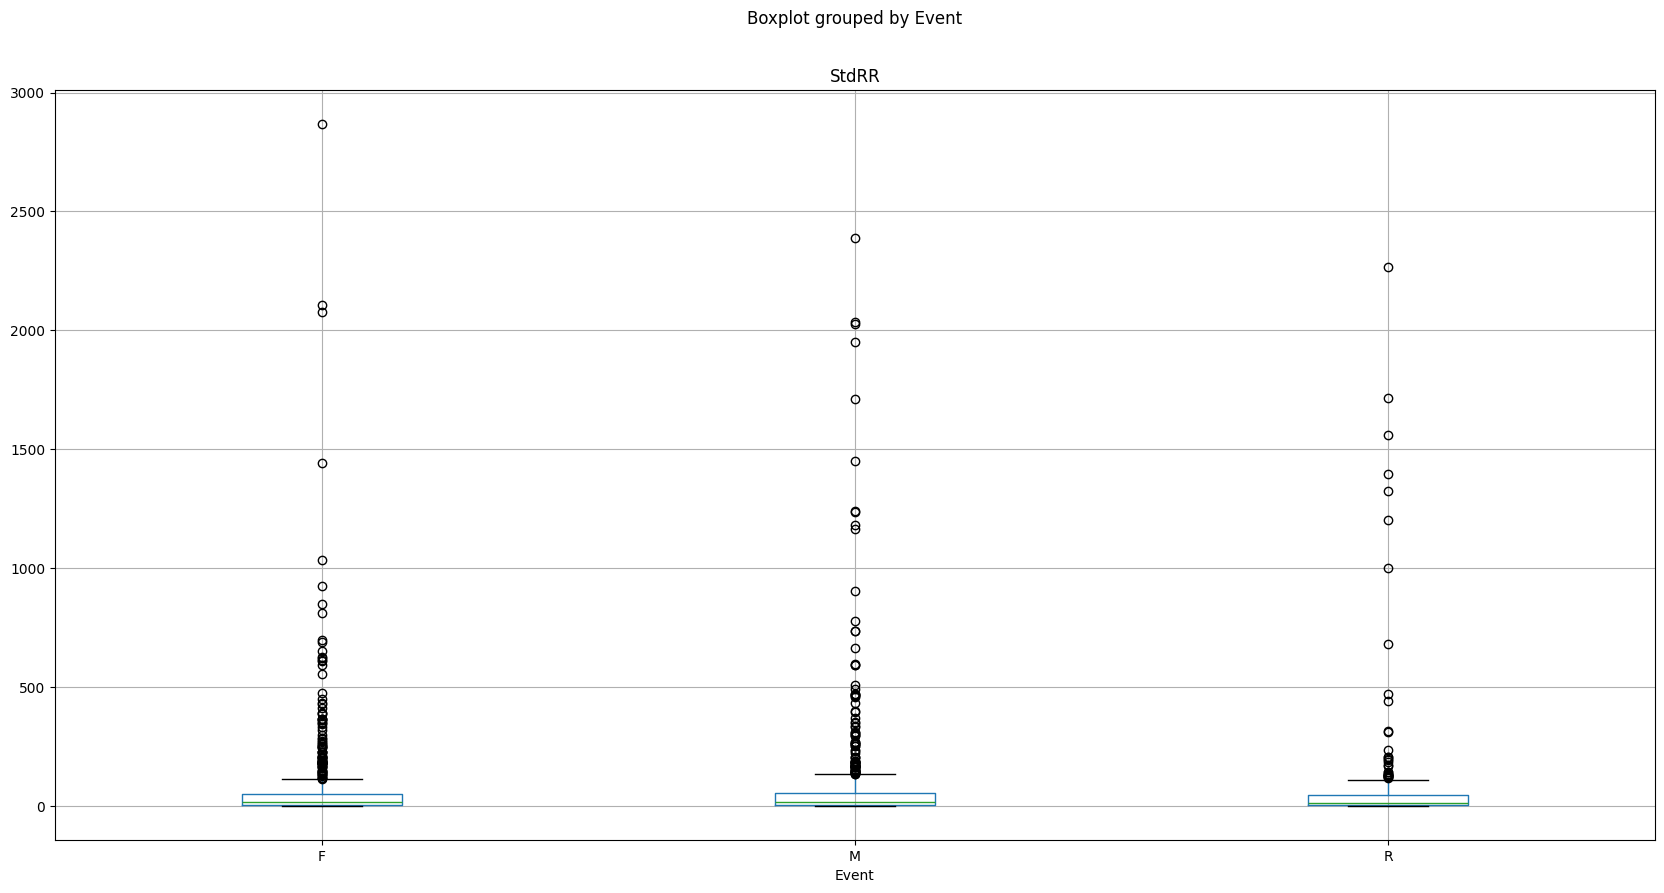

In [36]:
all_data_as_df.boxplot(column=['StdRR'], by='Event', figsize=(20,10))
plt.show()

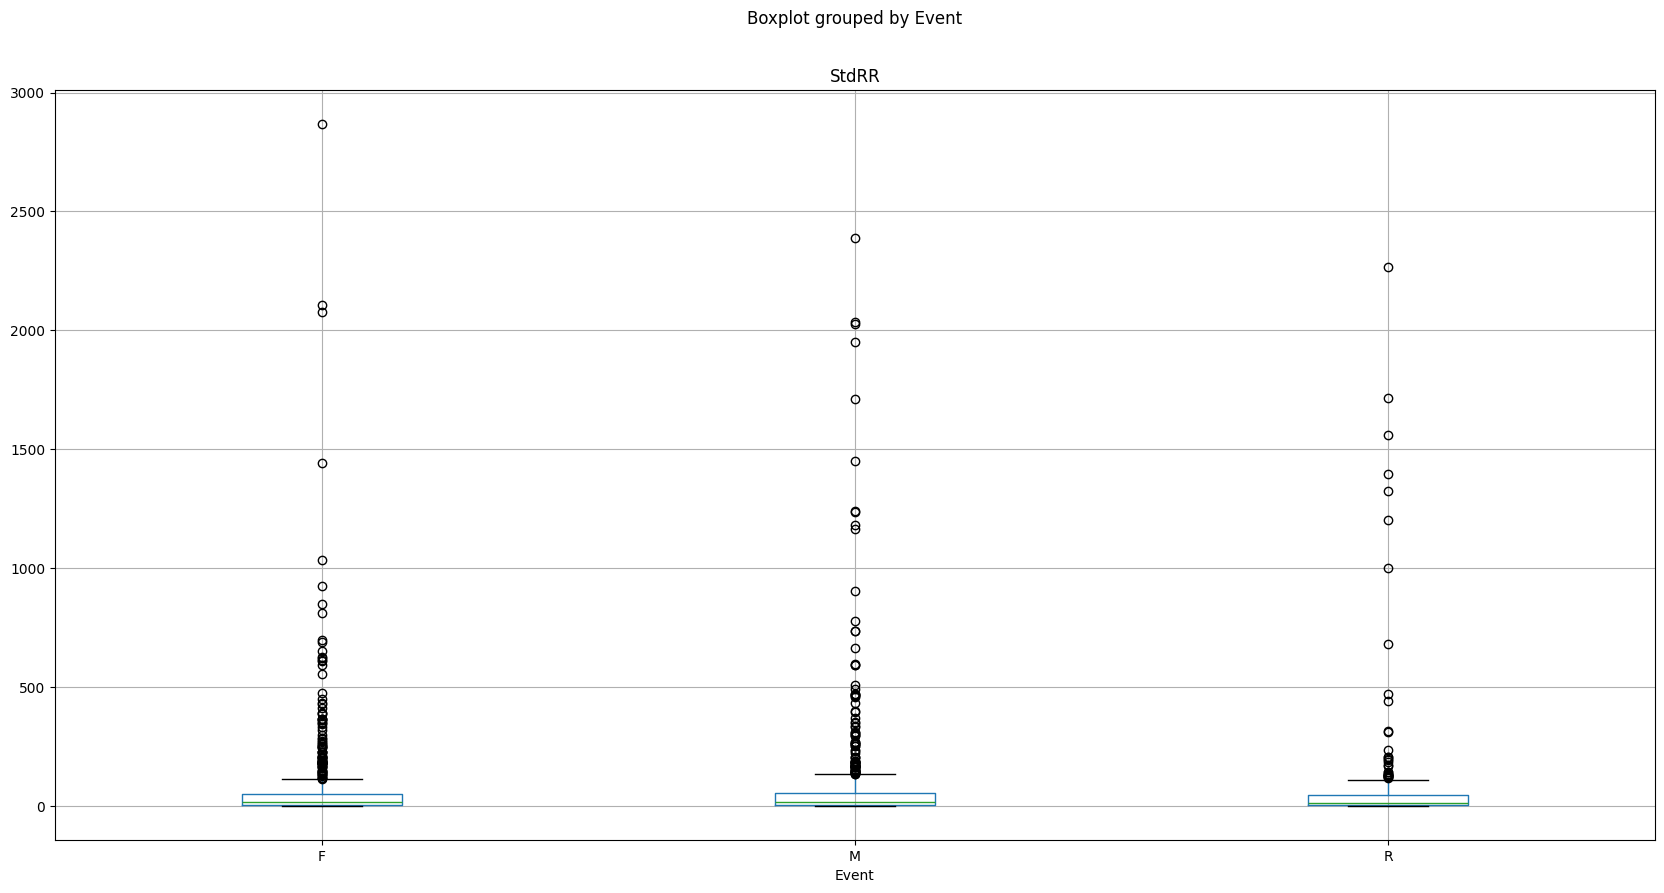

In [37]:
all_data_as_df.boxplot(column=['StdRR'], by='Event', figsize=(20,10))
plt.show()

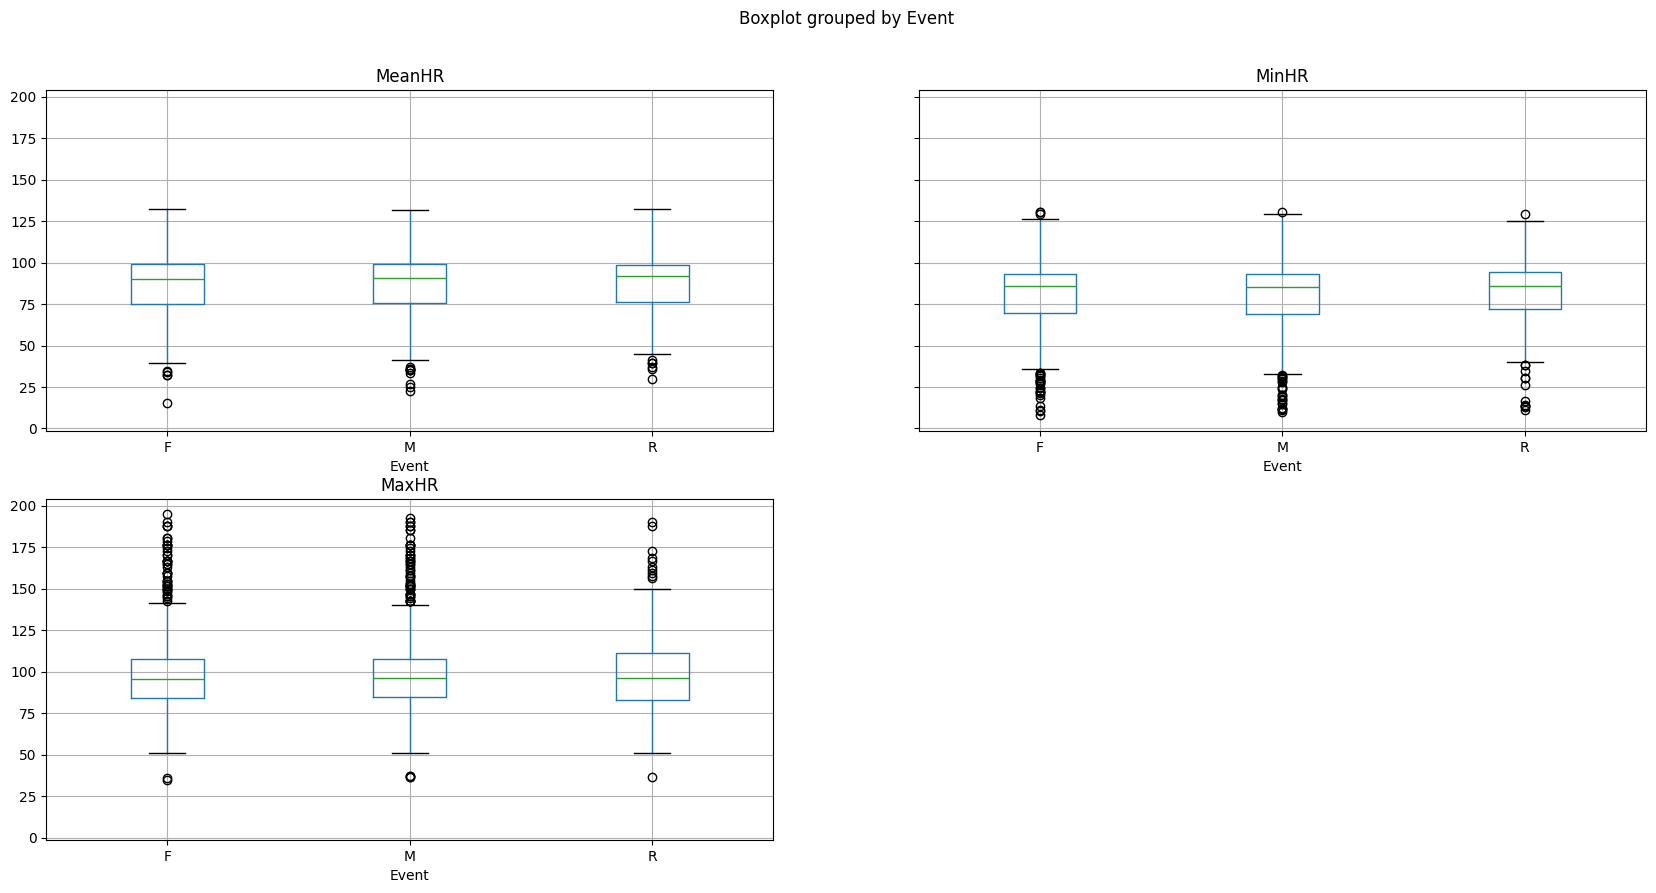

In [25]:
all_data_as_df.boxplot(column=['MeanHR', 'MinHR', 'MaxHR'], by='Event', figsize=(20,10), sharex=False)
plt.show()

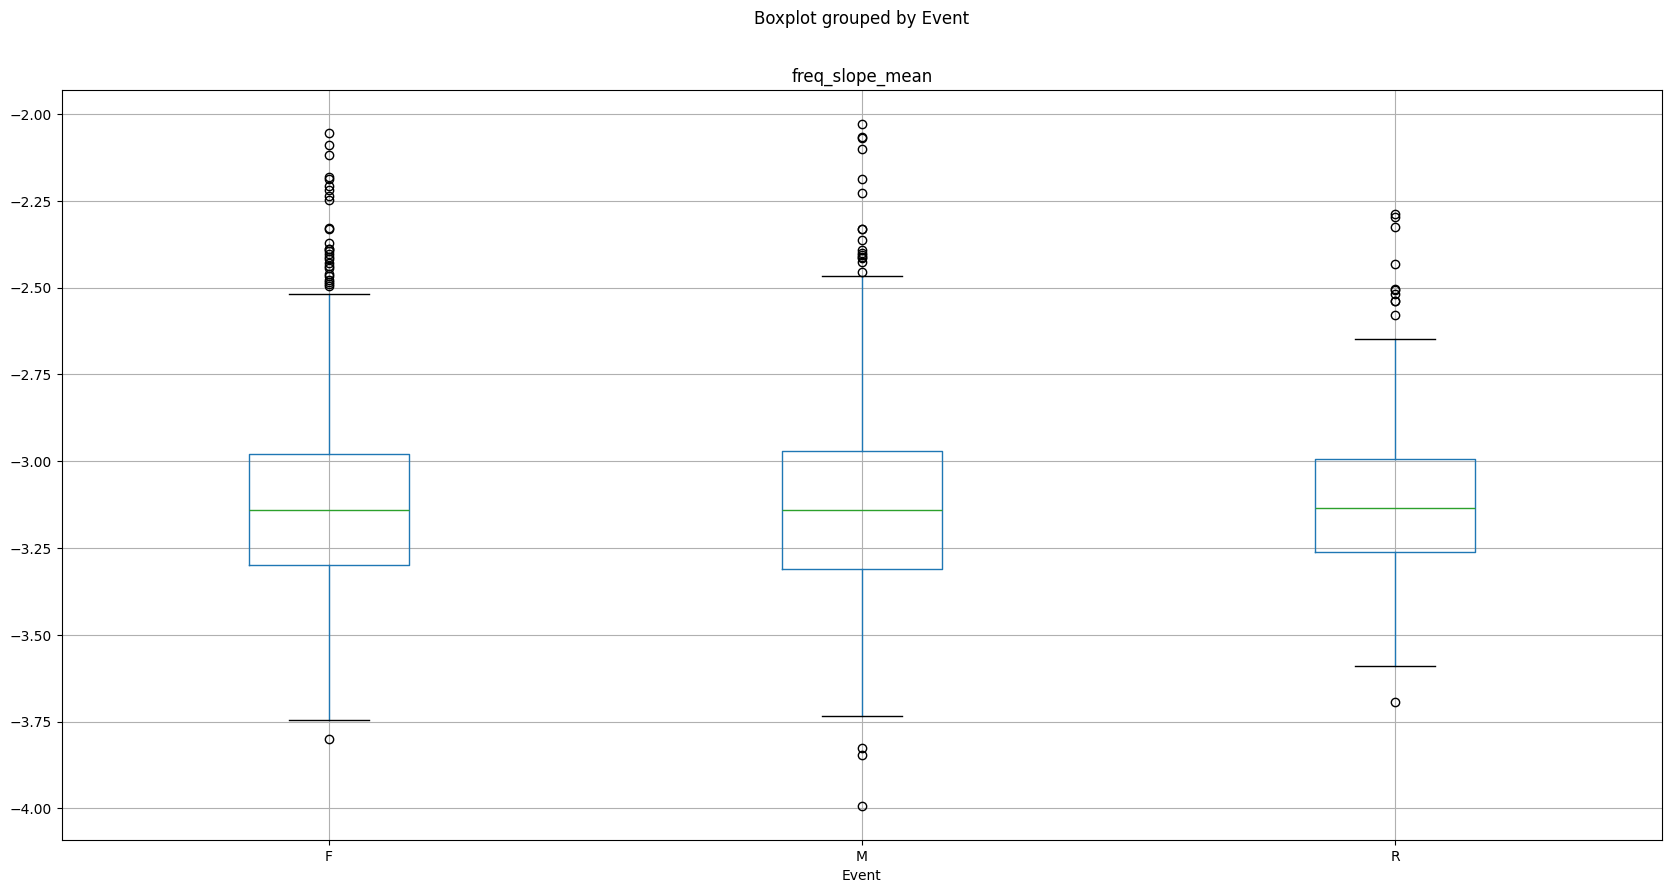

In [26]:
all_data_as_df.boxplot(column=['freq_slope_mean'], by='Event', figsize=(20,10))
plt.show()


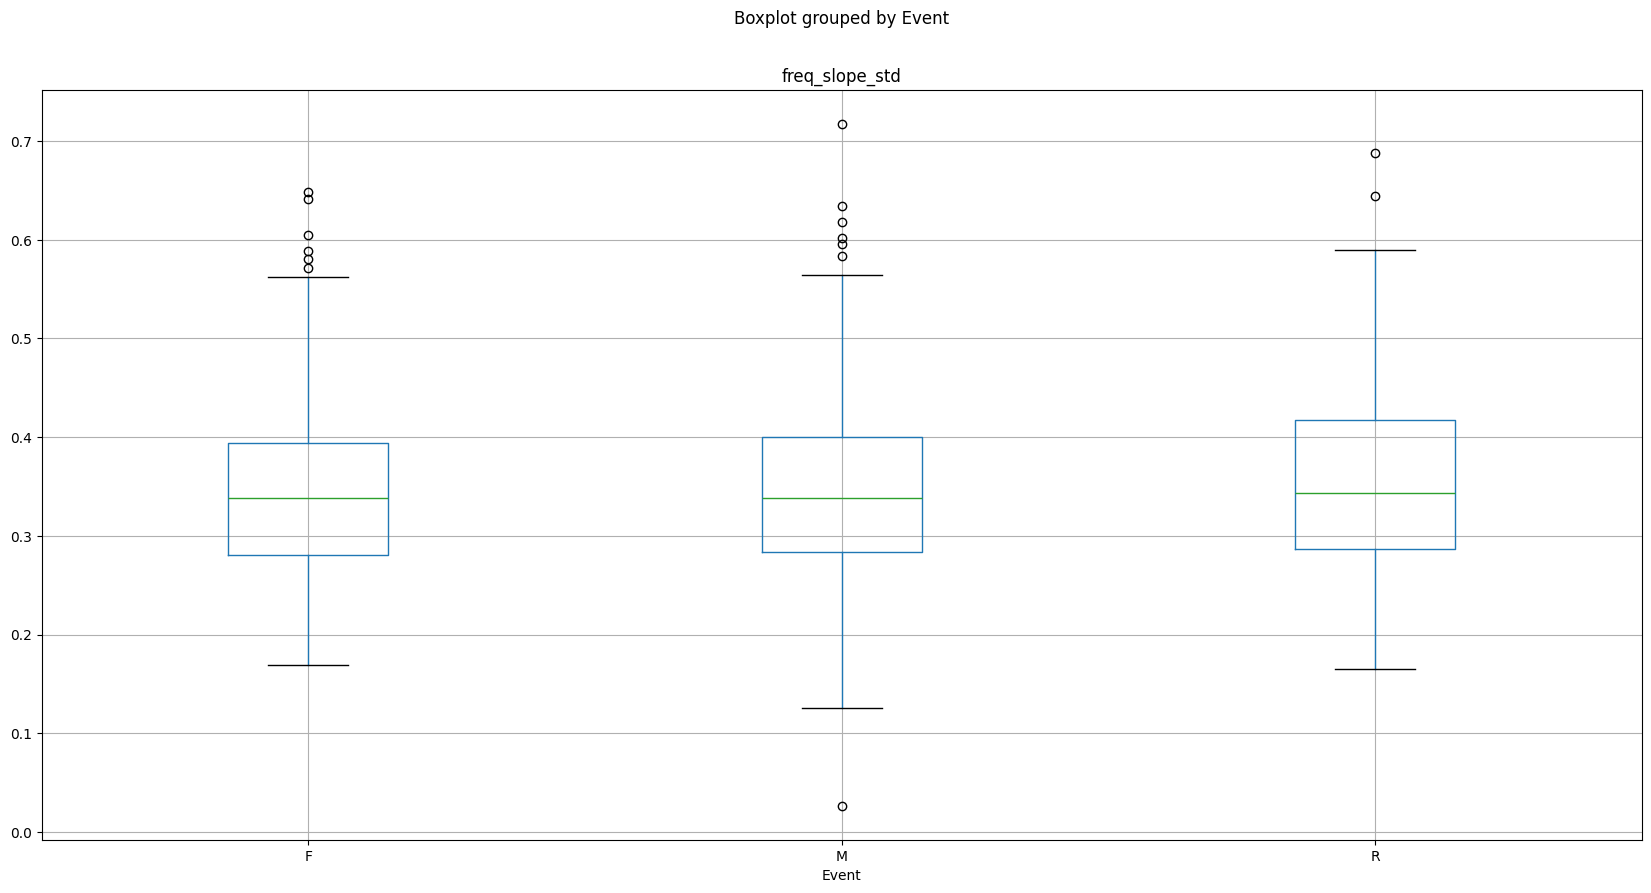

In [27]:
all_data_as_df.boxplot(column=['freq_slope_std'], by='Event', figsize=(20,10))
plt.show()

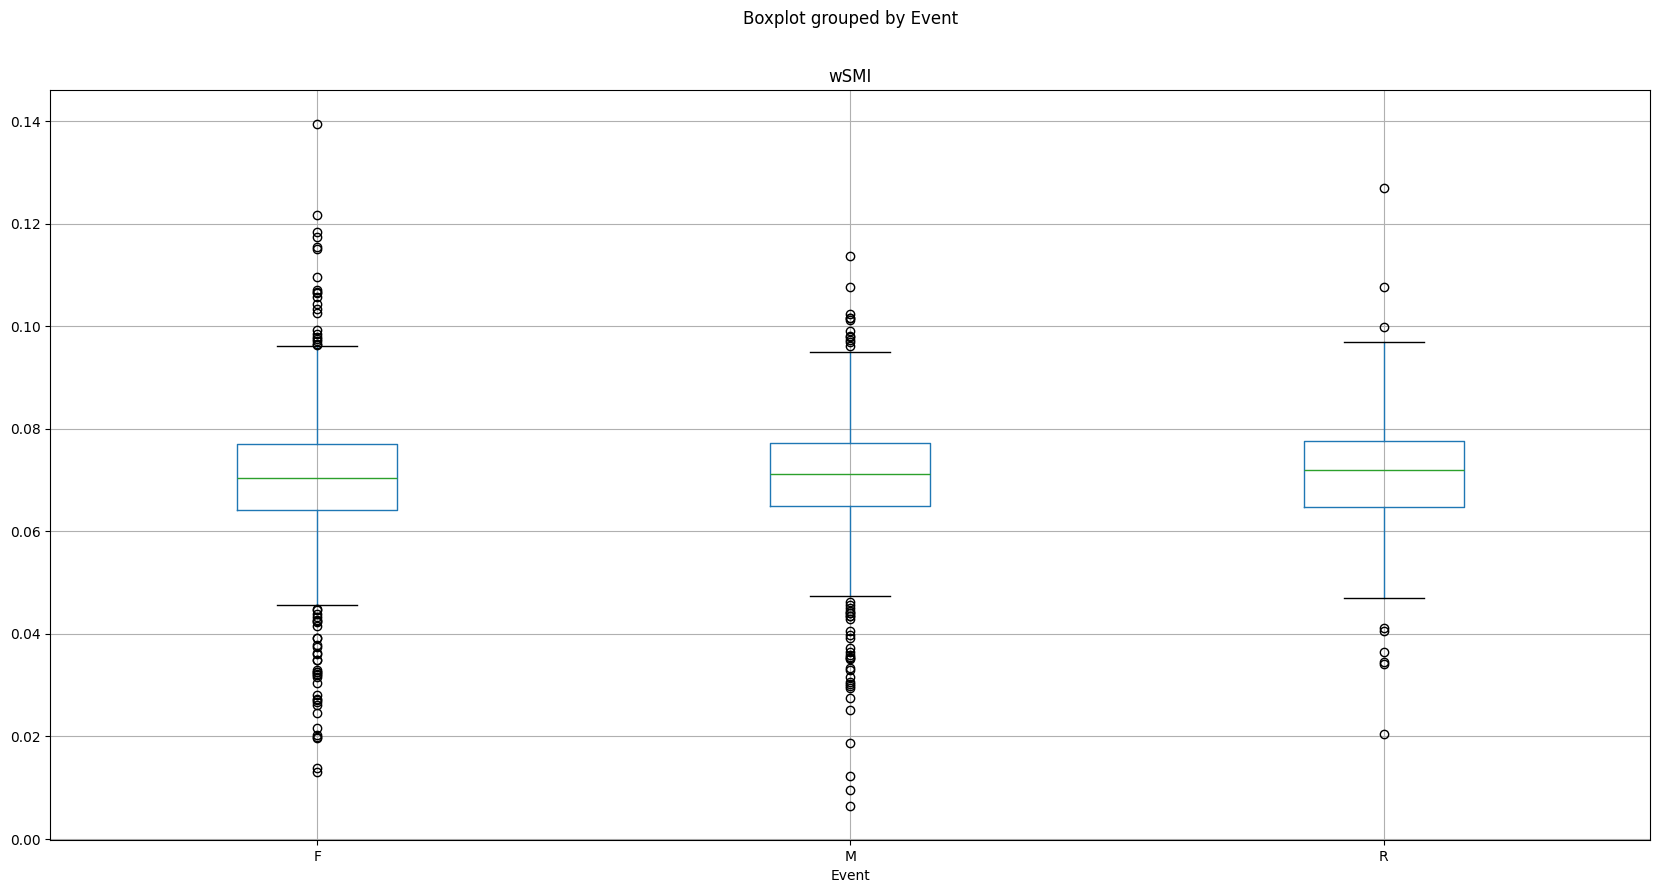

In [28]:
all_data_as_df.boxplot(column=['wSMI'], by='Event', figsize=(20,10))
plt.show()

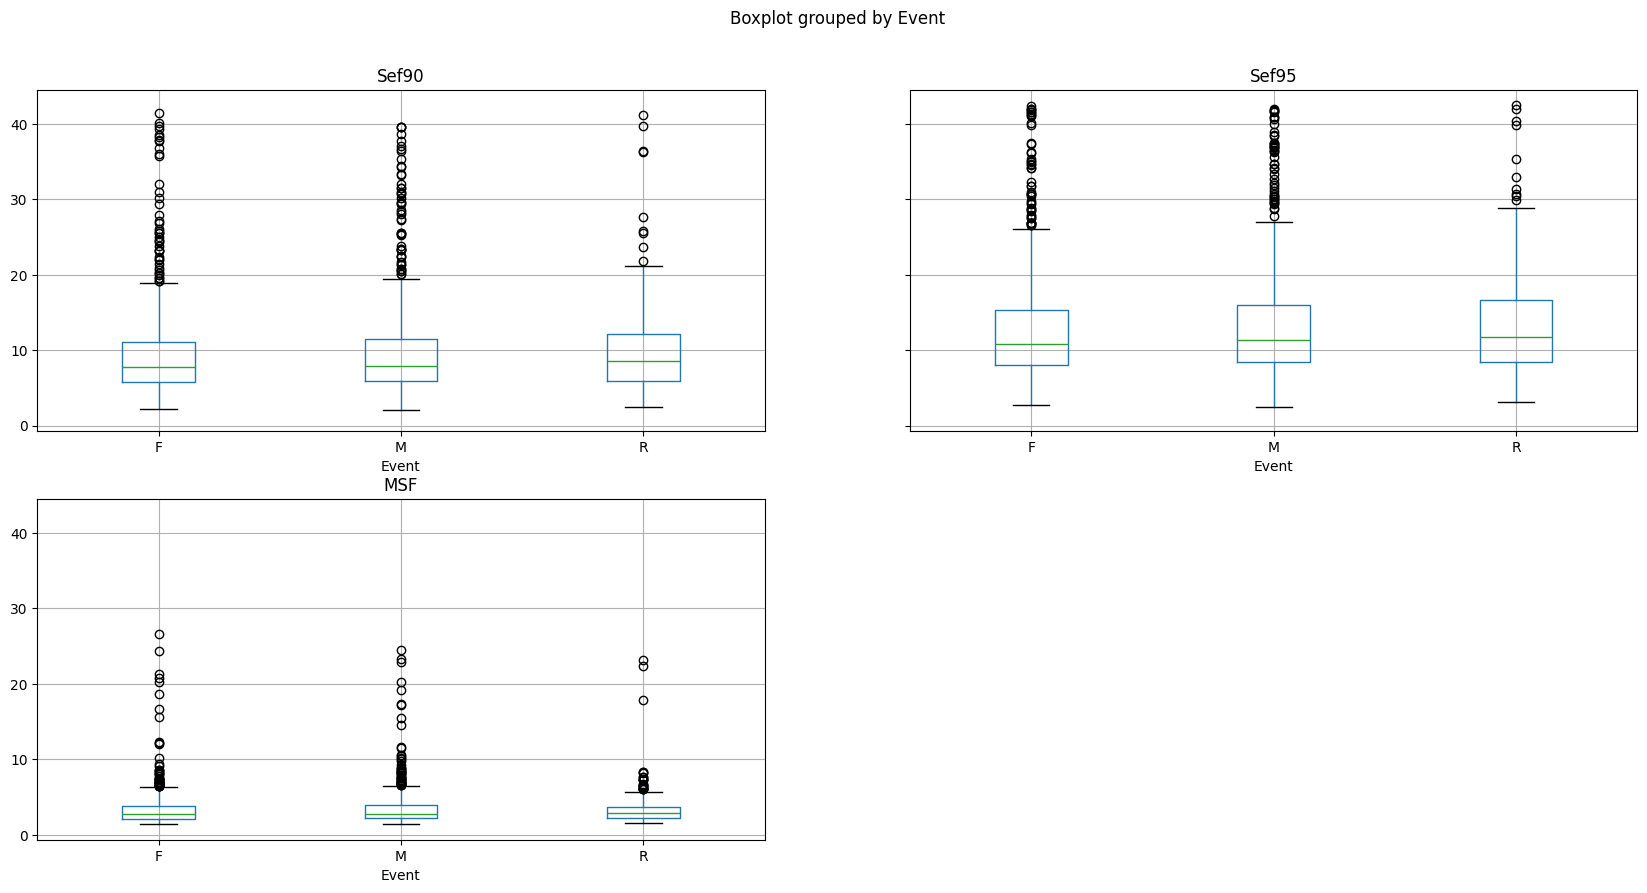

In [32]:
all_data_as_df.boxplot(column=['Sef90', 'Sef95', 'MSF'], by='Event', figsize=(20,10), sharex=False)
plt.show()

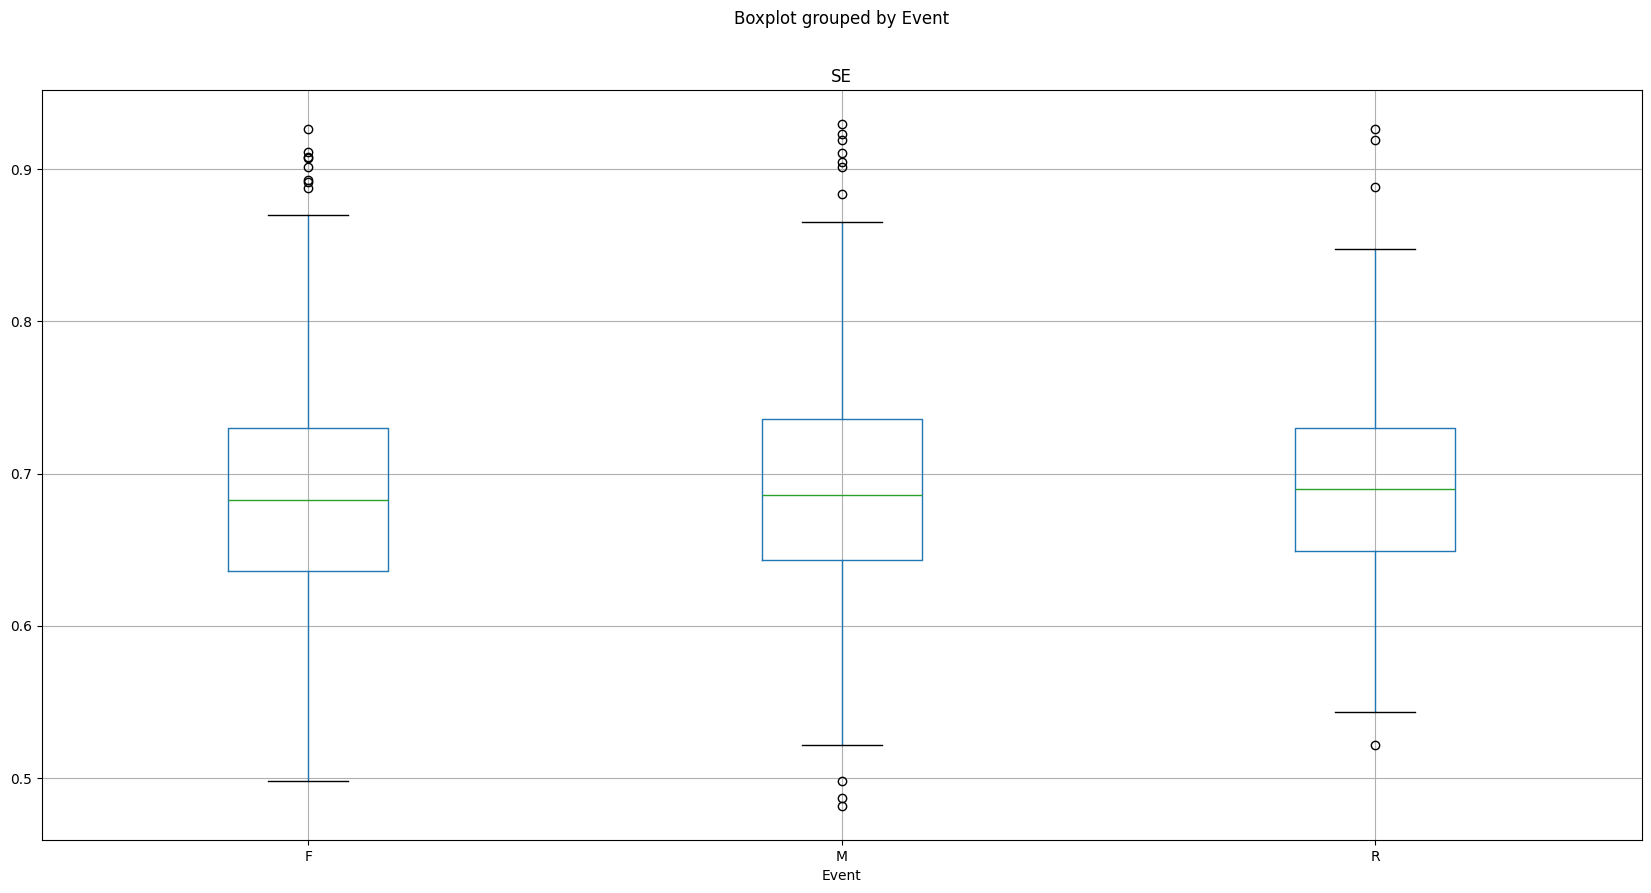

In [33]:
all_data_as_df.boxplot(column=['SE'], by='Event', figsize=(20,10))
plt.show()